In [122]:
# Make a sedona model with the exponential density profile and violent merger abundances


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator
plt.rcParams['axes.linewidth']=2
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%config InlineBackend.figure_format = 'retina'

In [2]:
vm_filepath = '/Users/anirbandutta/Downloads/merger_2012_11+09/'
vm_abundances = vm_filepath + 'merger_2012_11_09_isotopes.dat'
vm_density = vm_filepath + 'merger_2012_11_09_density.dat'

In [3]:
# Helper functions
# Plot density 

def plot_params(ax, ml_x, mil_x, ml_y, mil_y, s, invert=False):
    
    '''
    Remarks: Plotting parameters
    ax: axis object
    ml_x: major locator 'x'
    mil_x: minor locator 'x'
    ml_y: major locator 'y'
    mil_y: minor locator 'y'
    invert: Bool for the y-axis to be inverted 
    
    '''
    
    if invert:
        ax.invert_yaxis()
        
    ax.xaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', 
                   length = 13, width = 1.5, labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'in', 
                   length = 6, width = 0.8, labelsize = 20)
    ax.xaxis.set_major_locator(MultipleLocator(ml_x))
    ax.xaxis.set_minor_locator(MultipleLocator(mil_x))
    ax.yaxis.set_major_locator(MultipleLocator(ml_y))
    ax.yaxis.set_minor_locator(MultipleLocator(mil_y))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize = s)
    #tick.label1.set_fontweight('bold')
    
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize = s)


def plot_density(file_name, model_name, ml_x=5000, mil_x=1000, 
                 ml_y=1, mil_y=0.1, log_axis=False):
    
    col_names = ['Velocity', 'Density']       # (km/s, g/cm^3)
    density_df = pd.read_csv(file_name, names = col_names, sep='\s+', engine='python', skiprows=1) 
    
    fig_app = plt.figure(figsize = (5, 5), facecolor='white')
    ax = fig_app.add_subplot(111)
    plt.rcParams['axes.linewidth'] = 2
    plot_params(ax, ml_x = ml_x, mil_x = mil_x, ml_y = ml_y, mil_y = mil_y, s=10, invert=False)
    legend_properties = {'size':15, 'weight':'book'}
    ax.plot(density_df['Velocity'], density_df['Density'], 'r--', label=model_name)
    if log_axis:
        ax.set_yscale("log")
        ax.set_xscale("log")
    
    ax.set_xlabel(r'$\rm Velocity\ [km/s]$', fontsize=20)
    ax.set_ylabel(r'$\rm Density\ [g/cm^{3}]$', fontsize=20)
    ax.legend(fontsize=12, borderaxespad=3)
    ax.set_title("Density vs Velocity", fontsize=20)
    
    return density_df
    
    
    

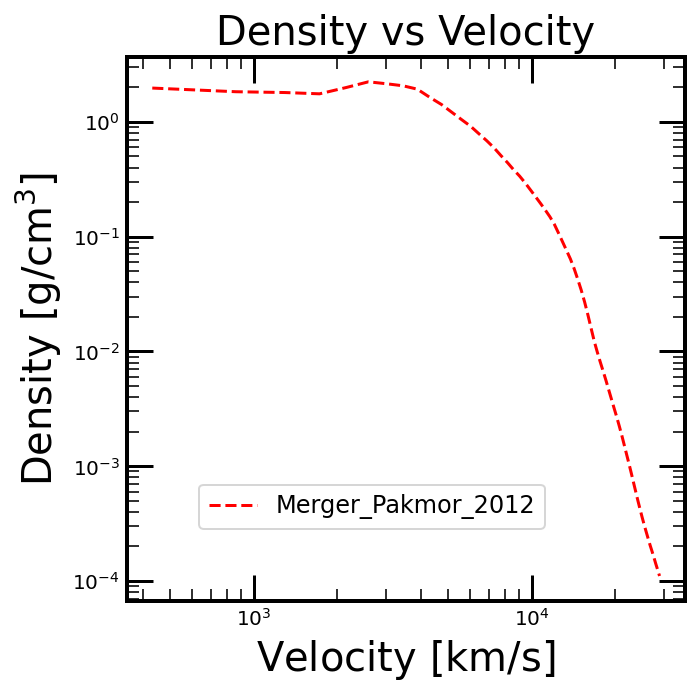

In [4]:
density_df = plot_density(vm_density, model_name='Merger_Pakmor_2012', log_axis=True)
plt.show()

In [100]:
def plot_abundance(file_name, elements=['c12', 'o16', 'si28', 's32', 'ca40',
                                        'fe54', 'co56', 'ni56', 'ni58'], save_file = False):
    
    '''
    Info: Remove the units from density and velocity for file readability.
    Velocity, Density, c12, o16, na22, mg24, si28, s32, ca40, sc42, ti44, v46, cr48, fe52, ni56, ni58
    '''
    legend_properties = {'size':15, 'weight':'book'}

    abundance_df = pd.read_csv(file_name, sep='\s+', engine='python')
    #abundance_df['Density'] = abundance_df['Density'].apply(lambda x: x)
    #abundance_df.to_csv('/home/anirban/2020sck/N5-def.csv', sep=',', header=False, index=False)
    #print (abundance_df.columns.tolist())
    constant = (4*np.pi)/3
    time_exp = 100                  # sec
    M_solar = 1.989e33              # gm
    abundance_df['Mass'] = abundance_df.apply(lambda x: 
                         constant*(x['Velocity']*10**5*time_exp)**3*x['Density'], axis=1)
    abundance_df['Mass_solar'] = abundance_df['Mass'].apply(lambda x: x/M_solar)
    abundance_df['M_Si'] = abundance_df.apply(lambda x: x['Mass_solar']*x['si28'], axis=1)
    
    mean_c12 = abundance_df['c12'].mean()
    #print ("c_12 abundance:", mean_c12)
    mean_o16 = abundance_df['o16'].mean()
    #print ("o_16 abundance:", mean_o16)
    mean_si28 = abundance_df['si28'].mean()
    #print ("si_28 abundance:", mean_si28)
    mean_s32 = abundance_df['s32'].mean()
    #print ("s_32 abundance:", mean_s32)
    mean_ca40 = abundance_df['ca40'].mean()
    #print ("ca_40 abundance:", mean_ca40)
    mean_ti48 = abundance_df['ti48'].mean()
    #print ("ti_48 abundance:", mean_ti48)
    mean_cr53 = abundance_df['cr53'].mean()
    #print ("cr_53 abundance:", mean_cr53)
    mean_fe54 = abundance_df['fe52'].mean()
    #print ("fe_54 abundance:", mean_fe54)
    mean_fe56 = abundance_df['fe56'].mean()
    #print ("fe_56 abundance:", mean_fe56)
    mean_co55 = abundance_df['co55'].mean()
    #print ("co_55 abundance:", mean_co55)
    mean_ni56 = abundance_df['ni56'].mean()
    #print ("ni_56 abundance:", mean_ni56)
    mean_ni58 = abundance_df['ni58'].mean()
    #print ("ni_58 abundance:", mean_ni58)
    
    #abundance_df['Sum'] = abundance_df[:, 2:].sum(axis=1)
    
    
    abundance_df_new = abundance_df[['c12', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ca40', 'fe54', 
                                     'ni56', 'ni58']]
    
    formats = {'c12': '{:.3f}', 'o16': '{:.3f}', 'ne20': '{:.3f}', 'mg24': '{:.3f}', 'si28': '{:.3f}', 
                's32': '{:.3f}', 'ca40': '{:.3f}', 'fe54': '{:.3f}', 'ni56': '{:.3f}', 'ni58': '{:.3f}'}
    
    abundance_df_new['Sum'] = abundance_df_new.sum(axis=1)
    abundance_df_new.iloc[:, :-1] = abundance_df_new.iloc[:, :-1].div(abundance_df_new.Sum, axis=0)
    
    abundance_df_new = abundance_df_new[['c12', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ca40', 'fe54', 
                                     'ni56', 'ni58']]

    for col, f in formats.items():
        abundance_df_new[col] = abundance_df_new[col].map(lambda x: f.format(x))
        
    if save_file:
        abundance_df_new.to_csv('/Users/anirbandutta/Documents/SNEXP/TypeIa_Models/vm_abundances.dat', 
                            sep=',', header=True, index=False)
    
    fig_app = plt.figure(figsize = (7, 7))
    ax = fig_app.add_subplot(111)
    plt.rcParams['axes.linewidth'] = 2
    plot_params(ax, ml_x = 5000, mil_x = 1000, ml_y = 0.1, mil_y = 0.01, s=10, invert=False)

    #for i in elements:
    ax.plot(abundance_df['Velocity'], abundance_df['c12'], color='#0b090a', label='C')
    ax.plot(abundance_df['Velocity'], abundance_df['o16'], color='#660708', label='O')
    #ax.plot(abundance_df['Velocity'], abundance_df['ne20'], color='crimson', label='Ne')
    ax.plot(abundance_df['Velocity'], abundance_df['na22'], color='orange', label='Na')
    ax.plot(abundance_df['Velocity'], abundance_df['mg24'], color='cyan', label='Mg')
    ax.plot(abundance_df['Velocity'], abundance_df['si28'], color='#ff6d00', label='Si')
    ax.plot(abundance_df['Velocity'], abundance_df['s32'], color='#ff002b', label='S')
    ax.plot(abundance_df['Velocity'], abundance_df['ca40'], color='#004e89', label='Ca')
    ax.plot(abundance_df['Velocity'], abundance_df['fe54'], color='#126782', label='Fe54')
    #ax.plot(abundance_df['Velocity'], abundance_df['fe56'], color='brown', label='Fe56')
    #ax.plot(abundance_df['Velocity'], abundance_df['co56'], color='#240046', label='Co56')
    ax.plot(abundance_df['Velocity'], abundance_df['ni56'], color='#072ac8', label='Ni56')
    ax.plot(abundance_df['Velocity'], abundance_df['ni58'], color='#4361ee', label='Ni58')
    
    #ax.axhline(0.003, ls='--', lw=3.0, color='#0b090a', label='C')
    #ax.axhline(0.36, ls='--', lw=3.0, color='#660708', label='O')
    #ax.axhline(0.15, ls='--', lw=3.0, color='#ff6d00', label='Si')
    #ax.axhline(0.005, ls='--', lw=3.0, color='#ff002b', label='S')
    #ax.axhline(0.018, ls='--', lw=3.0, color='#004e89', label='Ca')
    #ax.axhline(0.02, ls='-', lw=3.0, color='#355070', label='Ti')
    #ax.axhline(0.01, ls='-', lw=3.0, color='#7209b7', label='Cr')
    #ax.axhline(0.01, ls='--', lw=3.0, color='#240046', label='Co')
    #ax.axhline(0.18, ls='--', lw=3.0, color='#126782', label='Fe')
    #ax.axhline(0.41, ls='--', lw=3.0, color='#072ac8', label='56Ni')
    
    ax.set_xlabel(r'$\rm Velocity\ [km/s]$', fontsize=20)
    ax.set_ylabel(r'$\rm Mass\ fraction$', fontsize=20)
    ax.set_title("Abundance Profiles", fontsize=20)
    ax.set_yscale("log")
    ax.set_xscale("log")
    legend_1 = ax.legend(frameon= False, 
                     fancybox = False, shadow = False, framealpha=0.3, facecolor = 'white', 
                     prop = legend_properties, borderaxespad=3, loc='upper center',
                    bbox_to_anchor=(0.5, 1.50), ncol=3, markerscale=2.0) 

    
    return abundance_df_new


def homologous_expansion(rho_ref, t_ref, t_exp):
        
        '''
        rho_ref : rho(v) at time explosion time t0.
        t_ref: reference explosion epoch in days.
        t_exp: time since explosion when density is being calculated in days.
        
        returns: rho
        '''
        
        rho = rho_ref * (t_ref / t_exp)**3
        
        return rho
    
    
def rad_temp_for_loop(v, TO):
    
    
    temp = np.zeros(len(v))
    
    for i in range(len(v)):
        if v[i] < 1.0e9:
            temp[i] = TO * (1 + (1e9 - v[i])/1e9)
        else:
            temp[i] = TO * (v[i]/1e9)**(-2.)
            
    
    return temp    


def rad_temp(v, TO):
    
    if v < 1.0e9:
        temp = TO * (1 + (1e9 - v)/1e9)
    else:
        temp = TO * (v/1e9)**(-2.)
        
    return temp

/var/folders/hn/9wmjk6ks46qgvb8mv1h_8kcm0000gn/T/ipykernel_98072/4014818534.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abundance_df_new['Sum'] = abundance_df_new.sum(axis=1)
/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


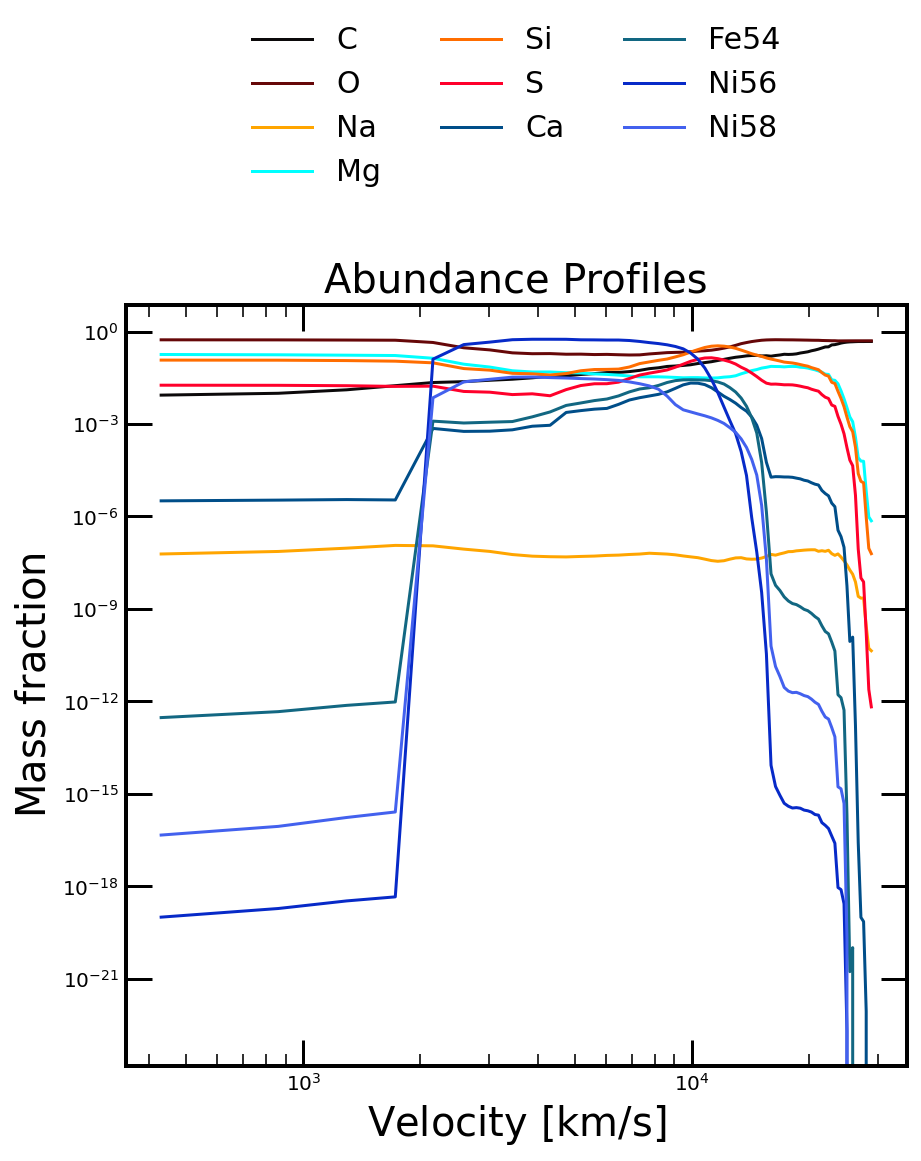

In [101]:
abundance_df = plot_abundance(vm_abundances, save_file=True)
#plt.ylim(0, 0.2)
plt.show();

In [229]:
violent_merger_dat  = '/Users/anirbandutta/Documents/SNEXP/TypeIa_Models/vm_abundances.dat'
violent_merger_df = pd.read_csv(violent_merger_dat, sep=',', engine='python')

In [230]:
model_name = 'model_2.0_1.7e+51'

In [231]:
model1_dat = '/Users/anirbandutta/Documents/SNEXP/TypeIa_Models/' + model_name
model1_df = pd.read_csv(model1_dat, sep='\s+', engine='python')

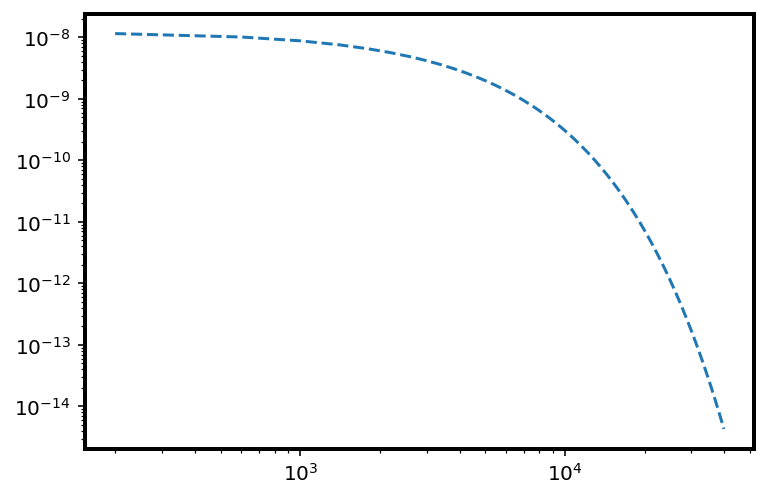

In [232]:
plt.plot(model1_df['velocity'], model1_df['density'], '--')
plt.xscale('log')
plt.yscale('log')

In [233]:
density_vm = density_df['Density']
velocity_vm = density_df['Velocity']

In [234]:
density_homo = homologous_expansion(density_vm, 0.001157, 1)

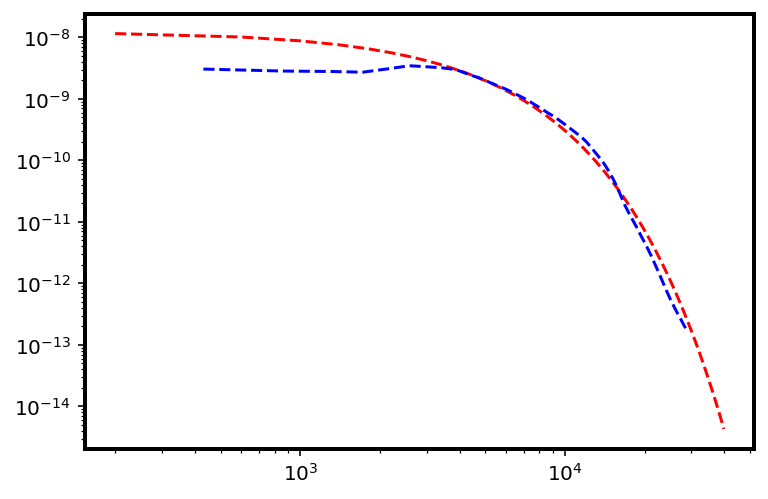

In [235]:
plt.plot(model1_df['velocity'], model1_df['density'], 'r--')
plt.plot(velocity_vm,  density_homo, 'b--')
plt.xscale('log')
plt.yscale('log')

In [236]:
interp_dens = interp1d(model1_df['velocity'], model1_df['density'])

In [237]:
density_interp_vm = interp_dens(velocity_vm)

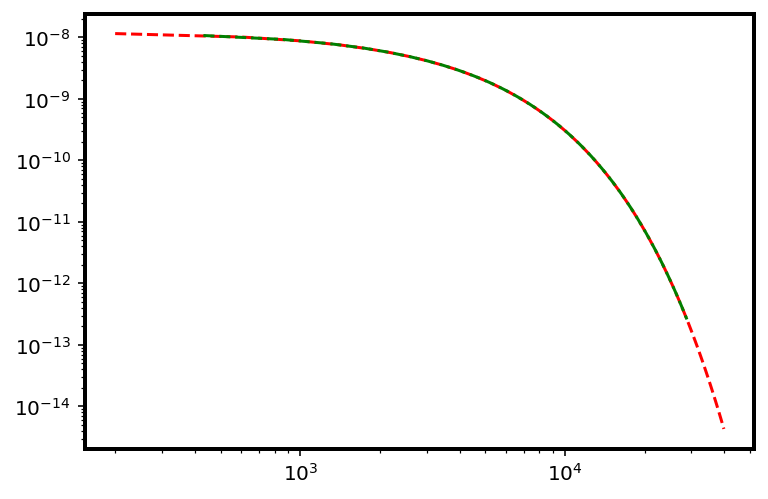

In [238]:
plt.plot(model1_df['velocity'], model1_df['density'], 'r--')
plt.plot(velocity_vm, density_interp_vm, 'g--')

plt.xscale('log')
plt.yscale('log')

In [239]:
TO = 1.0e4                     # initial temperature
texp = 1.0 * 86400             # in secs


In [240]:
velocity_vm = velocity_vm * 10**5. # km/s to cm/s

In [241]:
#density_interp_vm.shape

In [242]:
abundance_df = pd.DataFrame({'velocity': velocity_vm, 'density': density_interp_vm})


In [243]:
#abundance_df

In [244]:
abundance_df['temp'] = abundance_df['velocity'].apply(lambda x: rad_temp(x, TO))
abundance_df['temp'] = abundance_df['temp'].map(lambda x: '%10.4e' % x)


In [245]:
abundance_df['radius'] = abundance_df['velocity'].apply(lambda x: x * texp)
abundance_df['radius'] = abundance_df['radius'].map(lambda x: '%10.4e' % x)

In [246]:
abundances_vm_df = violent_merger_df[['c12', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ca40', 'fe54', 
                                'ni56', 'ni58']]

In [247]:
abundance_df_new = pd.concat([abundance_df, abundances_vm_df], axis=1)

In [248]:
abundance_df_new = abundance_df_new[['radius', 'velocity', 'density', 'temp',
                                          'c12', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ca40', 'fe54',
                                          'ni56', 'ni58']]

In [249]:
abundance_df_new['velocity'] = abundance_df_new['velocity'].map(lambda x: '%10.4e' % x)

In [250]:
shape_df = abundance_df_new.shape

rmin = 0.0#abundance_df_new['radius'].min()

texp_d = 86400

#len_z = len(Z)
#print (len_z)

In [251]:
# C, O, Ne, Mg, Si, S, Ca, Fe54, Ni56, Ni58
Z = [6, 8, 10, 12, 14, 16, 20, 26, 28, 28]
A = [12, 16, 20, 24, 28, 32, 40, 54, 56, 58]
len_z = len(Z)
f = open('/Users/anirbandutta/Documents/SNEXP/TypeIa_Models/' + 'sed_' + model_name + '.mod', 'w')

f.write("1D_sphere standard\n")
f.write(str(shape_df[0])+'\t'+str(rmin)+'\t'+str(texp_d)+'\t'+str(len_z)+'\n')
f.write(str(6.12)+'\t'+str(8.16)+'\t'+str(10.20)+'\t'+'\t'+str(12.24)+'\t'+
       str(14.28)+'\t'+str(16.32)+'\t'+str(20.40)+'\t'+str(26.54)+'\t'+str(28.56)+'\t'+str(28.58)+'\n')
abundance_df_new.to_csv(f, sep='\t', header=False, index=False)

f.close()

In [252]:
#plt.plot(violent_merger_df['Velocity'], violent_merger_df['c12'])
#plt.plot(model1_df['velocity'], c12_interp)

In [253]:
#abundance_df['Sum'] = abundance_df.sum(axis=1)

In [254]:
#abundance_df.iloc[:, :-1] = abundance_df.iloc[:, :-1].div(abundance_df.Sum, axis=0)